# T1 - Parte 6

## 6 - Viés-Variância

### 6.1 - Curvas de aprendizado

In [2]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import scipy.io as spio


def linearRegCostFunction(theta, X, y, lamb):
    m = len(X)

    custo = ((1 / (2 * m)) * np.sum((X.dot(theta) - y) ** 2) +
             (lamb / (2 * m)) * np.sum(theta[1:]) ** 2)

    return custo


def linearRegGrad(theta, X, y, lamb):
    m = len(y)

    h = X.dot(theta)

    loss = h - y

    gradient = ((1 / m) * (X.T.dot(loss)) +
                (lamb / m) * theta[1:])

    return gradient


def trainLinearReg(theta, X, y, lamb):
    # initial_theta = np.zeros((X.shape[1],1))
    # initial_theta = np.array([[15], [15]])

    res = minimize(fun=linearRegCostFunction, x0=theta,
                   args=(X, y, lamb), method=None, jac=linearRegGrad,
                   options={'maxiter': 5000})

    return(res.x)


def learningCurve(X, y, Xval, yval, lamb):
    m = len(y)

    erro_train = np.zeros((m, 1))
    erro_val = np.zeros((m, 1))

    theta = np.zeros(2)

    for i in range(m):
        res = trainLinearReg(theta, X[:i + 1], y[:i + 1], lamb)
        erro_train[i] = linearRegCostFunction(res, X[:i + 1],
                                              y[:i + 1], lamb)
        erro_val[i] = linearRegCostFunction(res, Xval, yval, lamb)

    return(erro_train, erro_val)

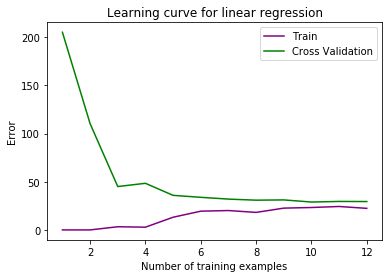

In [3]:
mat = spio.loadmat('ex5data1.mat', squeeze_me=True)

X = mat['X']
y = mat['y']

Xtest = mat['Xtest']
ytest = mat['ytest']

Xval = mat['Xval']
yval = mat['yval']

X_ones = np.c_[np.ones(X.shape[0]), X]
Xval_ones = np.c_[np.ones(Xval.shape[0]), Xval]

erro_treino, erro_validacao = learningCurve(X_ones, y, Xval_ones, yval, 0)

plt.plot(np.arange(1, 13), erro_treino,
         label='Train', color='purple')
plt.plot(np.arange(1, 13), erro_validacao,
         label='Cross Validation', color='green')
plt.title('Learning curve for linear regression')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend()
plt.show()